# Fake News Detection

📌 Assignment by: <font color='green'>Sameer Ganeshe & Samartha Prabhu</nfont>


## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 3.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.1/824.1 kB 3.6 MB/s 

## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [21]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', 70)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [21]:
# Import the first file - True.csv
true_news_df=pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_news_df=pd.read_csv('Fake.csv')


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [23]:
# Inspect the DataFrame with True News to understand the given data
true_news_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [25]:
# Inspect the DataFrame with Fake News to understand the given data
fake_news_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [29]:
# Print the column details for True News DataFrame

true_news_df.info()

true_news_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


(21417, 3)

In [31]:
# Print the column details for Fake News Dataframe

fake_news_df.info()

fake_news_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


(23523, 3)

In [35]:
# Print the column names of both DataFrames
print("fake_news_df column names",fake_news_df.columns.to_list())
print("true_news_df column names", true_news_df.columns.to_list())

fake_news_df column names ['title', 'text', 'date']
true_news_df column names ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [37]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true

true_news_df['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake

fake_news_df['news_label'] = 0


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [39]:
# Combine the true and fake news DataFrames into a single DataFrame

combined_news_df = pd.concat([true_news_df, fake_news_df], ignore_index=True)

In [41]:
# Display the first 5 rows of the combined DataFrame to verify the result

combined_news_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

In [43]:
#Checking the shape of Combined Data (21417+23523=44940 rows)
combined_news_df.shape

(44940, 4)

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [47]:
# Check Presence of Null Values

combined_news_df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [60]:
# Handle Rows with Null Values

In [51]:
combined_news_df.duplicated().sum() # Checking for duplicated records

5818

In [53]:
combined_news_df= combined_news_df.drop_duplicates()  # Removing duplicate records
combined_news_df.shape  # checking the null values again

(39122, 4)

In [55]:
combined_news_df.isnull().sum()   # Checking the Null Values agian

title          1
text           1
date          12
news_label     0
dtype: int64

In [57]:
round((combined_news_df.isnull().sum()/len(combined_news_df))*100,2)  # % of Null Values in Columns post removing duplicated records

title         0.00
text          0.00
date          0.03
news_label    0.00
dtype: float64

📌 Number of null values very less in terms of percentage. Hence good to drop the null value rows from the data.

In [64]:
combined_news_df = combined_news_df.dropna()  # Drop rows with any missing values

print(combined_news_df.isnull().sum())    # Validating presence of null values if any

title         0
text          0
date          0
news_label    0
dtype: int64


In [66]:
#Checking shape after dropping null values
combined_news_df.shape

(39110, 4)

In [68]:
combined_news_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [72]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
    # We can combine "title" and "text" columns as they give the similar information. Combining other columns will not make much sense

combined_news_df['news_text'] = combined_news_df['title'] + ' ' + combined_news_df['text'] # combining with a space in between


# Drop the irrelevant columns from the DataFrame as they are no longer needed
    # As the new column has text from both the columns "title" and "text", hence dropping "title" & "text".
    # Secondly, the "date" column also doesnot add much value to "Fake News detection" hence dropping it as well.

combined_news_df = combined_news_df.drop(['title', 'text', 'date'], axis=1)


# Display the first 5 rows of the updated DataFrame to check the result

combined_news_df.head()

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [74]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean=pd.DataFrame()

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label']=combined_news_df['news_label'].copy()


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [76]:
# Write the function here to clean the text and remove all the unnecessary elements

def clean_text(text):
    text=text.lower()                      # Convert to lower case
    text=re.sub(r'\[.*?\]','',text)        # Remove text in square brackets
    text=re.sub(r'[^\w\s]','',text)        # Remove punctuation
    text=re.sub(r'\b\w*\d+\w*\b','',text)  # Remove words with numbers
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [82]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['news_text']=combined_news_df['news_text'].apply(clean_text)

df_clean.head()    #Checking the clean dataset

news_label                                          news_text
0           1  as us budget fight looms republicans flip thei...
1           1  us military to accept transgender recruits on ...
2           1  senior us republican senator let mr mueller do...
3           1  fbi russia probe helped by australian diplomat...
4           1  trump wants postal service to charge much more...

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [84]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

def pos_tag_lemmatization(text):    
    doc= nlp(text)
    tokens=[token.lemma_
            for token in doc
            if token.tag_ in ['NN','NNS']
            and not token.is_stop ]
    return ' '.join(tokens)
    

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [88]:

tqdm.pandas()

# Apply POS tagging and lemmatization function to cleaned text
processed_text=df_clean['news_text'].progress_apply(pos_tag_lemmatization)

# Store it in a separate column in the new DataFrame
df_clean['processed_text']=processed_text


100%|█████████████████████████████████████| 39110/39110 [51:59<00:00, 12.54it/s]


### Save the Cleaned data as a csv file (Recommended)

In [92]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [105]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label                                          news_text  \
0           1  as us budget fight looms republicans flip thei...   
1           1  us military to accept transgender recruits on ...   
2           1  senior us republican senator let mr mueller do...   
3           1  fbi russia probe helped by australian diplomat...   
4           1  trump wants postal service to charge much more...   

                                      processed_text  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  mueller job counsel investigation link electio...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service service ship package amzno fight...

In [107]:
# Check the dimensions of the DataFrame
df_clean.shape

(39110, 3)

In [98]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39110 entries, 0 to 39109
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   news_label      39110 non-null  int64 
 1   news_text       39110 non-null  object
 2   processed_text  39098 non-null  object
dtypes: int64(1), object(2)
memory usage: 916.8+ KB


📌  There are no null values and the data type is object for text and int for label

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [109]:
#Importing Train val Split

from sklearn.model_selection import train_test_split

In [111]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data

train_df,test_df=train_test_split(df_clean, train_size=0.7, random_state=42)

In [113]:
# Checking the shapes of train and test set data

print(train_df.shape)
print(test_df.shape)


(27377, 3)
(11733, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [119]:
# Add a new column to calculate the character length of cleaned news text

train_df['cleaned_char_len'] = train_df['news_text'].apply(len)


In [121]:
# Add a new column to calculate the character length of lemmatized news text with POS tags removed

train_df['lemmatized_char_len'] = train_df['processed_text'].str.len()


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

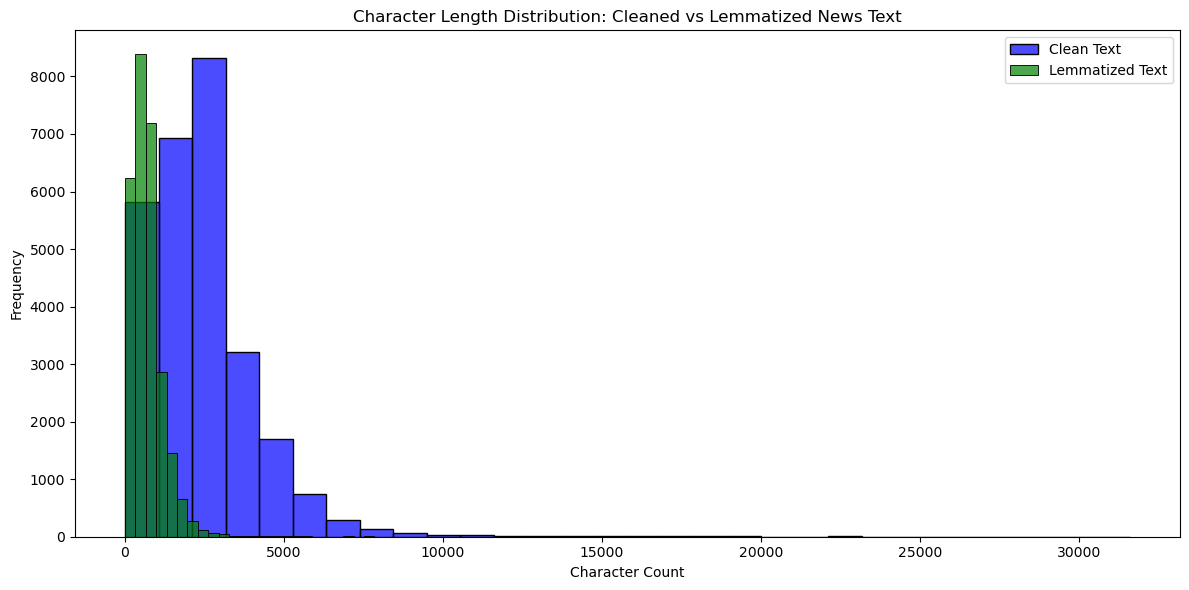

In [300]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))

# Add histogram for cleaned news text
sns.histplot(train_df['cleaned_char_len'],bins=30,color='blue',alpha=0.7,label='Clean Text')

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(train_df['lemmatized_char_len'],bins=30,color='green',alpha=0.7,label='Lemmatized Text')

plt.title('Character Length Distribution: Cleaned vs Lemmatized News Text')

plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

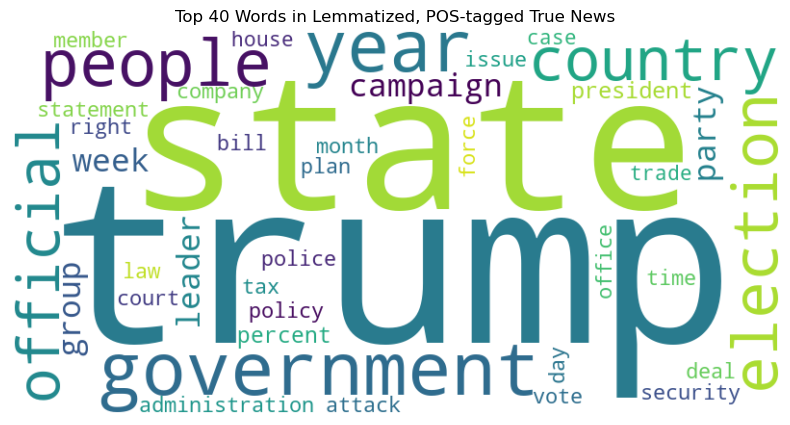

In [127]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

#Importing WordCloud
from wordcloud import WordCloud

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_data = train_df[train_df['news_label'] == 1]
true_news_data['processed_text'] = true_news_data['processed_text'].apply(lambda x: str(x))

true_news_text = " ".join(true_news_data['processed_text']) # Combine all processed text of true news into one large text


# Generate word cloud for True News

tokens = true_news_text.split()
word_freq = nltk.FreqDist(tokens)
top_40_words = dict(word_freq.most_common(40))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Top 40 Words in Lemmatized, POS-tagged True News')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

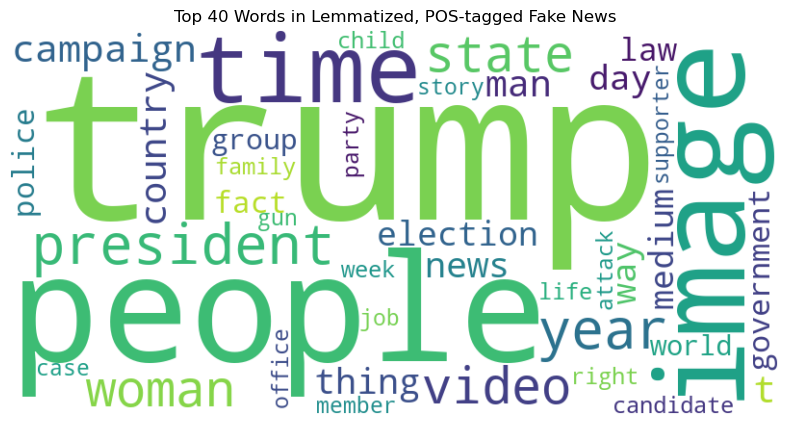

In [129]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_data = train_df[train_df['news_label'] == 0]
fake_news_data['processed_text'] = fake_news_data['processed_text'].apply(lambda x: str(x))

fake_news_text = " ".join(fake_news_data['processed_text'])   # Combine all processed text of true news into one large text

# Generate word cloud for Fake News
tokens = fake_news_text.split()
word_freq = nltk.FreqDist(tokens)
top_40_words = dict(word_freq.most_common(40))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Top 40 Words in Lemmatized, POS-tagged Fake News')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [131]:
# Write a function to get the specified top n-grams

def get_top_ngrams(text_data, ngram_range=(1, 1), top_n=10):
    
    vectorizer = CountVectorizer(ngram_range=ngram_range) # Initialize the CountVectorizer with the required ngram range
    ngram_matrix = vectorizer.fit_transform(text_data)    # Fit the vectorizer to the text data and get n-gram counts
    
    # Get the frequency of each n-gram (sum of occurrences)
    ngram_freq = ngram_matrix.sum(axis=0).A1              # Convert the sparse matrix to a dense array
    ngram_names = vectorizer.get_feature_names_out()      # Get the names of the n-grams
    
    # Create a DataFrame to organize the n-grams and their frequencies
    ngram_df = pd.DataFrame({'N-gram': ngram_names, 'Frequency': ngram_freq})
    
    # Sort the n-grams by frequency and get the top 'top_n' n-grams
    ngram_df = ngram_df.sort_values(by='Frequency', ascending=False).head(top_n)
    
    return ngram_df

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [137]:
# Handle NaN values in the text data

print(train_df.isnull().sum())


news_label             0
news_text              0
processed_text         9
cleaned_char_len       0
lemmatized_char_len    9
dtype: int64


In [135]:
round((train_df.isnull().sum()/len(train_df))*100,2)  # % of Null Values in text data

news_label             0.00
news_text              0.00
processed_text         0.03
cleaned_char_len       0.00
lemmatized_char_len    0.03
dtype: float64

📌 Number of null values very less in terms of percentage. Hence good to drop the null value rows from the data.

In [140]:
train_df = train_df.dropna()      # Drop rows with any missing values

print(train_df.isnull().sum())    # Validating presence of null values if any

news_label             0
news_text              0
processed_text         0
cleaned_char_len       0
lemmatized_char_len    0
dtype: int64


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [255]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

top_10_unigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(1, 1), top_n=10).reset_index(drop=True)
print(top_10_unigrams)

       N-gram  Frequency
0       trump      21972
1       state      14187
2  government      13667
3        year      13106
4      people      10567
5    election       9859
6     country       9509
7    official       9323
8    campaign       7728
9       party       7633


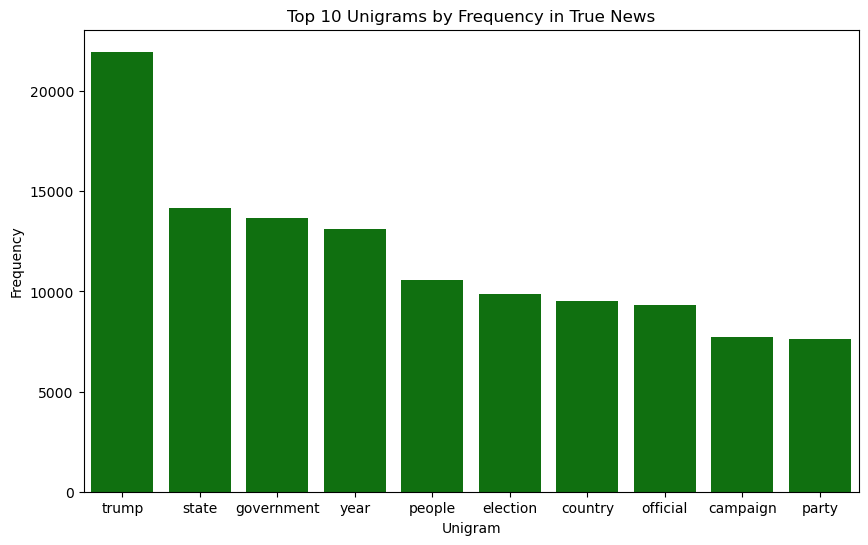

In [257]:
# Bar plot for top 10 unigrams

plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_unigrams, color='green')
plt.xlabel('Unigram')
plt.title('Top 10 Unigrams by Frequency in True News')
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [259]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_10_bigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(2, 2), top_n=10).reset_index(drop=True)
print(top_10_bigrams)

                 N-gram  Frequency
0       news conference        964
1        trump campaign        891
2  trump administration        781
3        climate change        766
4       percent percent        737
5       request comment        735
6        security force        675
7   intelligence agency        652
8            tax reform        652
9  house representative        607


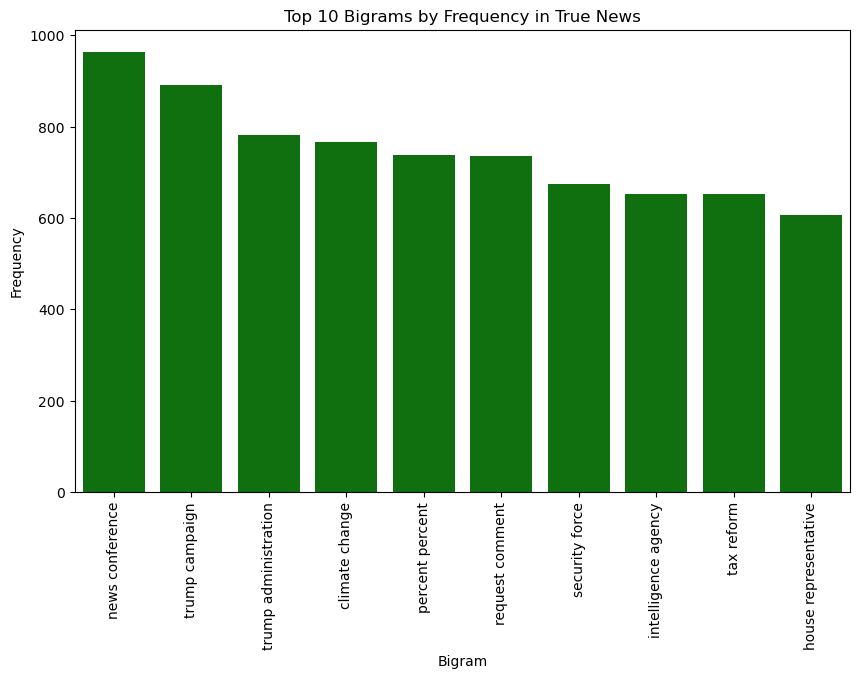

In [261]:
# Bar plot for top 10 bigrams

plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_bigrams, color='green')
plt.xlabel('Bigram')
plt.xticks(rotation=90)
plt.title('Top 10 Bigrams by Frequency in True News')
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [263]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

top_10_trigrams = get_top_ngrams(true_news_data['processed_text'], ngram_range=(3, 3), top_n=10).reset_index(drop=True)
print(top_10_trigrams)

                            N-gram  Frequency
0     official condition anonymity        247
1                 tax rate percent        180
2        state department official        129
3        article staff involvement        126
4  involvement creation production        126
5       staff involvement creation        126
6             rate percent percent        114
7             circuit court appeal        110
8                 use email server        106
9            trump transition team         91


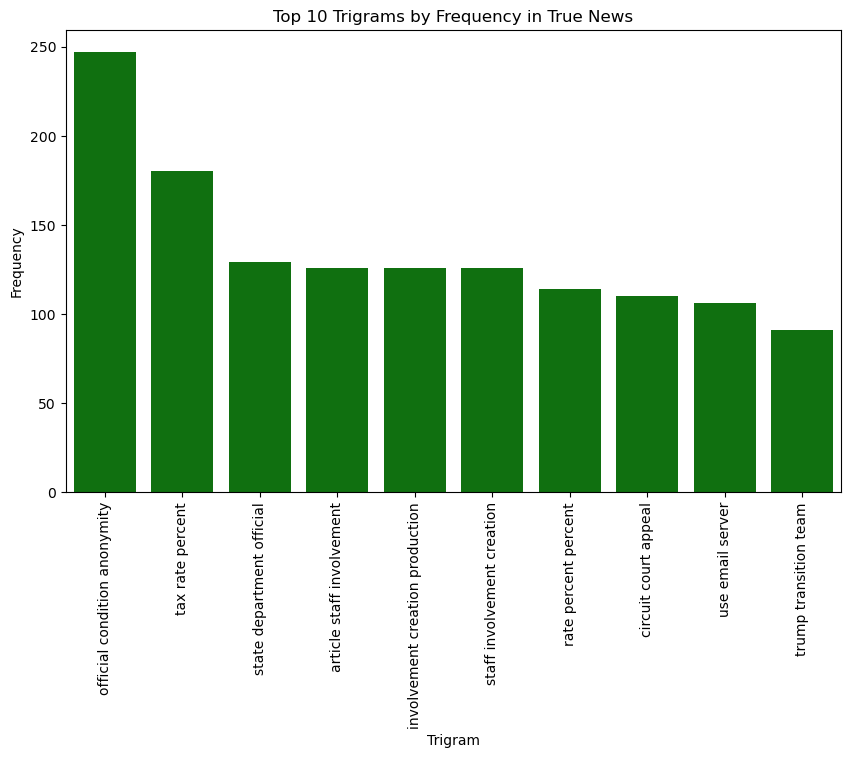

In [265]:
# Bar plot for top 10 trigrams

plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_trigrams, color='green')
plt.xlabel('Trigram')
plt.xticks(rotation=90)
plt.title('Top 10 Trigrams by Frequency in True News')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [267]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

top_10_unigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(1, 1), top_n=10).reset_index(drop=True)
print(top_10_unigrams)

      N-gram  Frequency
0      trump      31035
1     people      14562
2      image       9438
3       time       8510
4  president       7886
5       year       7717
6      state       6493
7      woman       6479
8      video       6475
9   campaign       6037


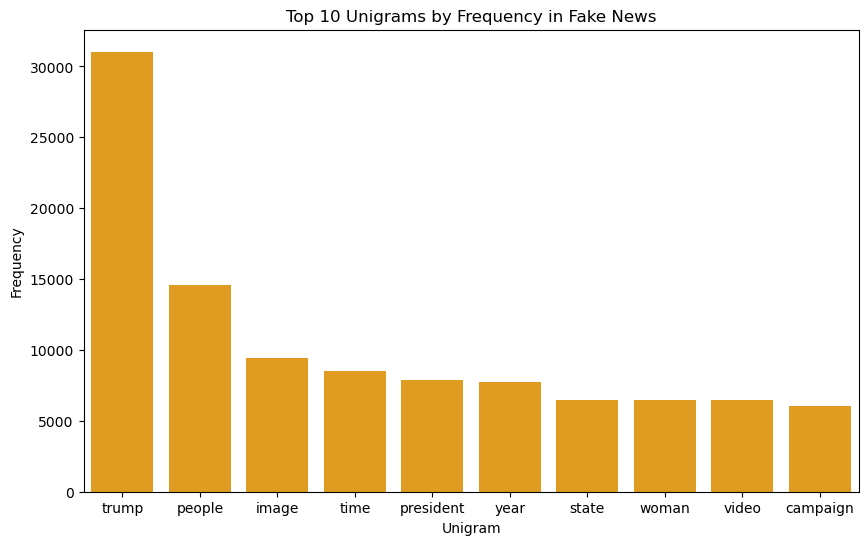

In [269]:
# Bar plot for top 10 Unigram

plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_unigrams, color='orange')
plt.xlabel('Unigram')
plt.title('Top 10 Unigrams by Frequency in Fake News')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [271]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

top_10_bigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(2, 2), top_n=10).reset_index(drop=True)
print(top_10_bigrams)

                  N-gram  Frequency
0            image image       1293
1        trump supporter       1191
2         trump campaign       1028
3         screen capture        955
4         police officer        856
5  trump realdonaldtrump        847
6           donald trump        844
7        law enforcement        747
8           century wire        686
9            getty image        665


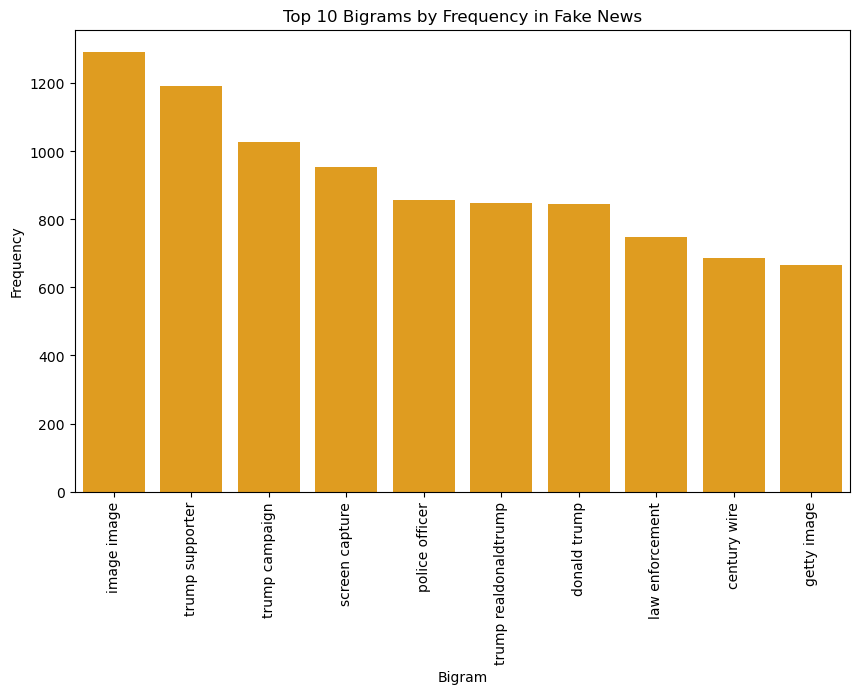

In [273]:
# Bar plot for top 10 Bigram

plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_bigrams, color='orange')
plt.xlabel('Bigram')
plt.xticks(rotation=90)
plt.title('Top 10 Bigrams by Frequency in Fake News')
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [275]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

top_10_trigrams = get_top_ngrams(fake_news_data['processed_text'], ngram_range=(3, 3), top_n=10).reset_index(drop=True)
print(top_10_trigrams)

                        N-gram  Frequency
0         video screen capture        520
1           image video screen        489
2            image getty image        418
3            news century wire        339
4         image screen capture        320
5             image chip image        176
6       image video screenshot        157
7      law enforcement officer        121
8  trump realdonaldtrump trump         91
9            century wire file         86


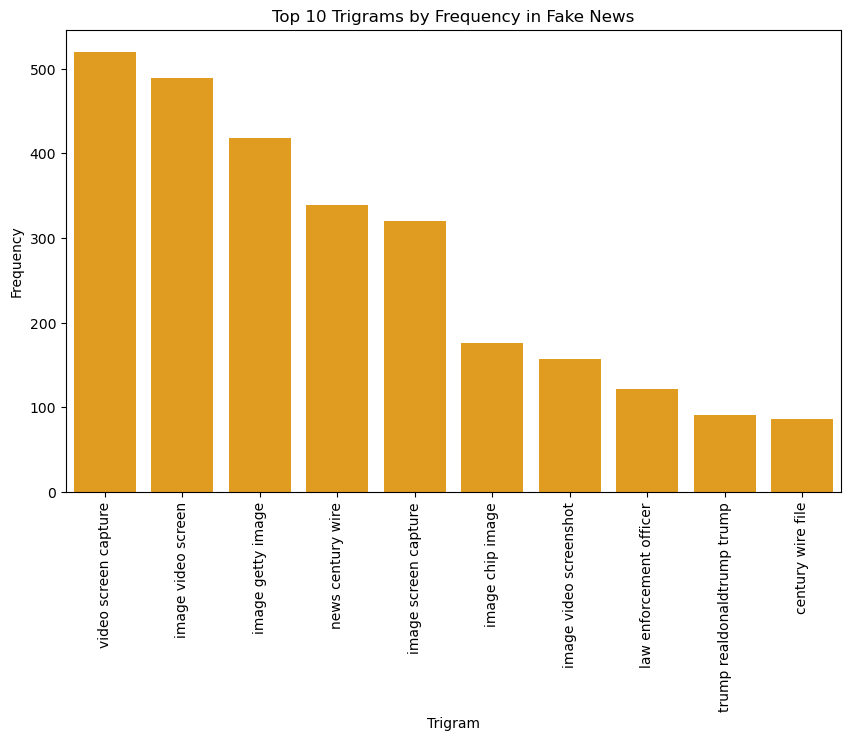

In [277]:
# Bar plot for top 10 trigrams

plt.figure(figsize=(10, 6))
sns.barplot(x='N-gram', y='Frequency',data=top_10_trigrams, color='orange')
plt.xlabel('Trigram')
plt.xticks(rotation=90)
plt.title('Top 10 Trigrams by Frequency in Fake News')
plt.show()


📌 <font color='green'>__Observations__</nfont>

- Unigrams- True News uses formal terms like state, government, year. Fake News leans towards visual and sensational words like people, Image, time etc.There are some common themes like Trump,State indicating the nature of political data.
- Bigrams-True News bigrams are news/government related(like news conference, trump campaign, trump administration). Fake News features are repeatitive or viral terms (like image image, trump supporter etc)
- Trigrams- True News has structured phrases(like official condition aninomity, tax rate percentage). Fake news trigrams are primarily media related (like video screen capture, image video screen), hinting visual or fabricated content.

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [174]:
#Import Gensim for Downloading Word2Vec

import gensim.downloader as api

In [193]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

word2vec_model = api.load('word2vec-google-news-300')

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [226]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def get_word2vec_vectors(text_data, model):
    vectors = []
    
    for text in text_data:
        # convert to string if not already
        text = str(text)
            
        # Tokenize the text and remove empty tokens
        tokens = text.split()
        
        # Filter out words not in the Word2Vec model
        vector = []
        for token in tokens:
            if token in model.key_to_index:
                vector.append(model[token])  # Get vector for each word
                
        # If there are vectors, compute the average of word vectors for the sentence
        if vector:
            sentence_vector = np.mean(vector, axis=0)  # Use mean of word vectors
            vectors.append(sentence_vector)
        else:
            vectors.append(np.zeros(model.vector_size))  # Use zero vector if no word is found in model
    return vectors


In [228]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27368 entries, 32407 to 15795
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   news_label           27368 non-null  int64  
 1   news_text            27368 non-null  object 
 2   processed_text       27368 non-null  object 
 3   cleaned_char_len     27368 non-null  int64  
 4   lemmatized_char_len  27368 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 11733 entries, 35665 to 30035
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   news_label      11733 non-null  int64 
 1   news_text       11733 non-null  object
 2   processed_text  11730 non-null  object
dtypes: int64(1), object(2)
memory usage: 366.7+ KB


(None, None)

In [234]:
# Get the Word2Vec vectors for the training data
X_train = get_word2vec_vectors(train_df['processed_text'], word2vec_model)
X_test = get_word2vec_vectors(test_df['processed_text'], word2vec_model)


## Extract the target variable for the training data and validation data
y_train = train_df['news_label']
y_test= test_df['news_label']

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

#Import GridSearchCV for Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [246]:
## Initialise Logistic Regression model

lr=LogisticRegression(max_iter=1000, random_state=42)

#Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


## Train Logistic Regression model on training data

#Set up GridSearchCV
grid_search = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

## Predict on validation data
y_pred=grid_search.predict(X_test)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [248]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall   :", round(recall,4))
print("F1 Score :", round(f1,4))


Accuracy : 0.9091
Precision: 0.9107
Recall   : 0.9225
F1 Score : 0.9166


📌 <font color='green'>__Observations__</nfont>

- 90.91% of the total news articles are correctly classified (Accuracy).
- 91.07% of the news articles predicted as true are actually true (Precision).
- 92.25% of the actual true news articles are correctly predicted as true (Recall).
- 91.66% is the F1 Score, which is the harmonic mean of precision and recall — indicating a good balance between both.


In [251]:
# Classification Report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5386
           1       0.91      0.92      0.92      6347

    accuracy                           0.91     11733
   macro avg       0.91      0.91      0.91     11733
weighted avg       0.91      0.91      0.91     11733



📌 <font color='green'>__Observations__</nfont>

- The model achieved an overall accuracy of 91%, correctly classifying 11,733 news articles.
- True News was classified slightly better, with 92% F1-score, compared to 90% for Class 0.
- Both macro and weighted averages are balanced at 91%, indicating consistent performance across both classes.


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [253]:
## Initialise Decision Tree model
dt=DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
param_grid_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid_dt,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)


grid_search.fit(X_train, y_train)
# Best model
best_dt = grid_search.best_estimator_

## Predict on validation data
y_pred=grid_search.predict(X_test)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [283]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall   :", round(recall,4))
print("F1 Score :", round(f1,4))

Accuracy : 0.8184
Precision: 0.8296
Recall   : 0.836
F1 Score : 0.8328


📌 <font color='green'>__Observations__</nfont>

- 81.84% of the total news articles are correctly classified (Accuracy).
- 82.96% of the news articles predicted as true are actually true (Precision).
- 83.6% of the actual true news articles are correctly predicted as true (Recall).
- 83.28% is the F1 Score, which is the harmonic mean of precision and recall — indicating a good balance between both.


In [286]:
# Classification Report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      5386
           1       0.83      0.84      0.83      6347

    accuracy                           0.82     11733
   macro avg       0.82      0.82      0.82     11733
weighted avg       0.82      0.82      0.82     11733



📌 <font color='green'>__Observations__</nfont>

- The model achieved an overall accuracy of 82%, correctly classifying 11,733 news articles.
- True News was classified slightly better, with 83% F1-score, compared to 80% for Class 0.
- Both macro and weighted averages are balanced at 82%, indicating consistent performance across both classes.


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [291]:
## Initialise Random Forest model
rf=RandomForestClassifier(random_state=42)
#Define param grid
param_grid_rf = {
    'n_estimators': [100, 200],          
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [2, 5],          
}


## Train Random Forest model on training data

#Set up Grid Search
grid_search = GridSearchCV(estimator=rf,
                            param_grid=param_grid_rf,
                            cv=5,
                            scoring='accuracy',
                            n_jobs=-1)

grid_search.fit(X_train,y_train)

## Predict on validation data
y_pred=grid_search.predict(X_test)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [293]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall   :", round(recall,4))
print("F1 Score :", round(f1,4))


Accuracy : 0.8776
Precision: 0.8718
Recall   : 0.9072
F1 Score : 0.8891


📌 <font color='green'>__Observations__</nfont>

- 87.76% of the total news articles are correctly classified (Accuracy).
- 87.18% of the news articles predicted as true are actually true (Precision).
- 90.72% of the actual true news articles are correctly predicted as true (Recall).
- 88.91% is the F1 Score, which is the harmonic mean of precision and recall — indicating a good balance between both.


In [296]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      5386
           1       0.87      0.91      0.89      6347

    accuracy                           0.88     11733
   macro avg       0.88      0.87      0.88     11733
weighted avg       0.88      0.88      0.88     11733



📌 <font color='green'>__Observations__</nfont>

- The model achieved an overall accuracy of 88%, correctly classifying 11,733 news articles.
- True News was classified slightly better, with 89% F1-score, compared to 86% for Class 0.
- Both macro and weighted averages are balanced at 88%, indicating consistent performance across both classes.


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

📌 <font color='green'>__Key Insights:__</nfont>
- True news articles use formal, institutional language, while fake news often relies on emotional, dramatic, or sensational wording.
- N-gram analysis: True news focuses on structured governance and policy related words, whereas fake news frequently includes visual and viral terms like "image" and "video."

📌 <font color='green'>__Model Performance:__</nfont>
- Logistic Regression is the best performing model, with high evaluation metrics (91% accuracy) making it useful for identification of true news articles.
- It indeed has balanced evaluation metrics along with interpretability.
- Useful for identifying true news and understanding feature influence.
  
📌 <font color='green'>__Impact:__</nfont>
- The semantic classification approach, using Word2Vec embeddings and robust preprocessing, effectively captures linguistic patterns to distinguish fake from true news.
- The solution is scalable and adaptable to other misinformation domains.